In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from sklearn import metrics
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance 


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)

In [4]:
data=data.dropna()

In [5]:
data.columns = boston.feature_names
data.head()
data['PRICE'] = boston.target 

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
corr = data.corr()
corr.shape

(14, 14)

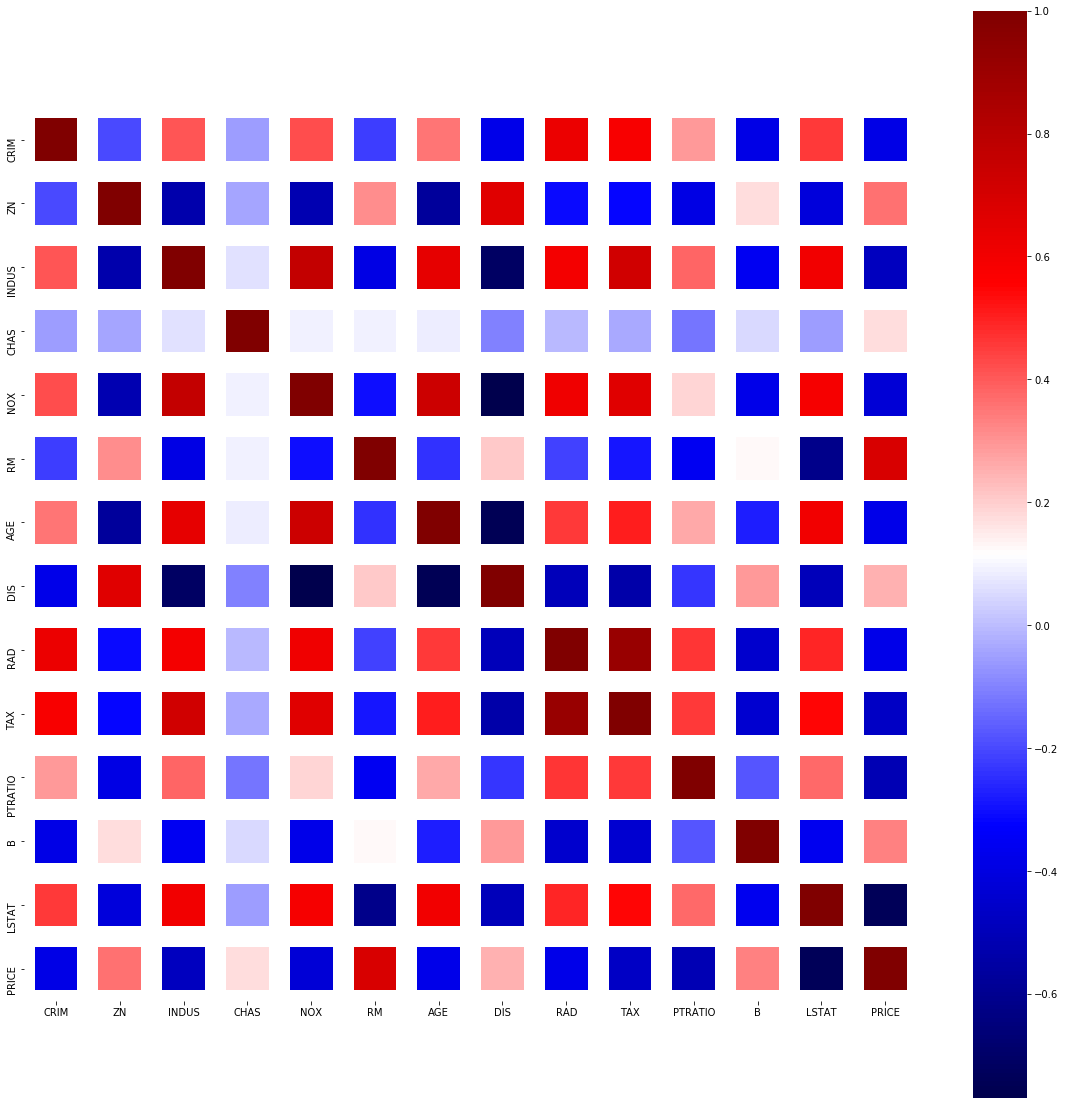

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            linewidths=20, 
            cbar=True, 
            square=True, 
            fmt='.1f',
            annot=False, 
            cmap='seismic')

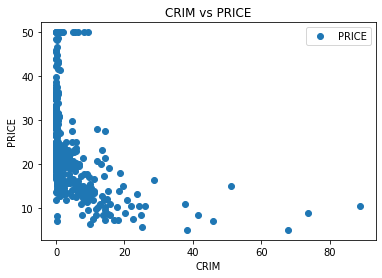

In [10]:
data.plot(x='CRIM', y='PRICE', style='o')  
plt.title('CRIM vs PRICE')  
plt.xlabel('CRIM')  
plt.ylabel('PRICE')  
plt.show()

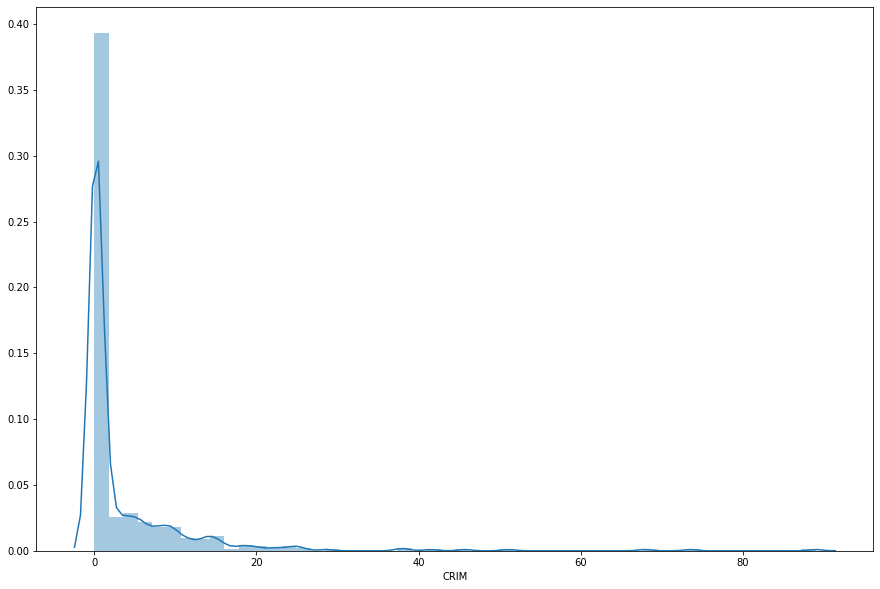

In [11]:
#We doing this to observe the average CRIM, which may support or disagree
# with the scatterplot 
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['CRIM'])

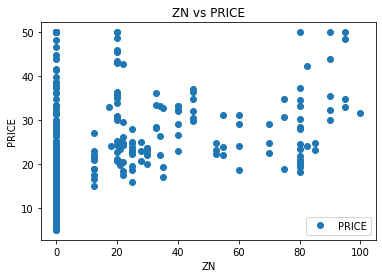

In [12]:
data.plot(x='ZN', y='PRICE', style='o')  
plt.title('ZN vs PRICE')  
plt.xlabel('ZN')  
plt.ylabel('PRICE')  
plt.show()

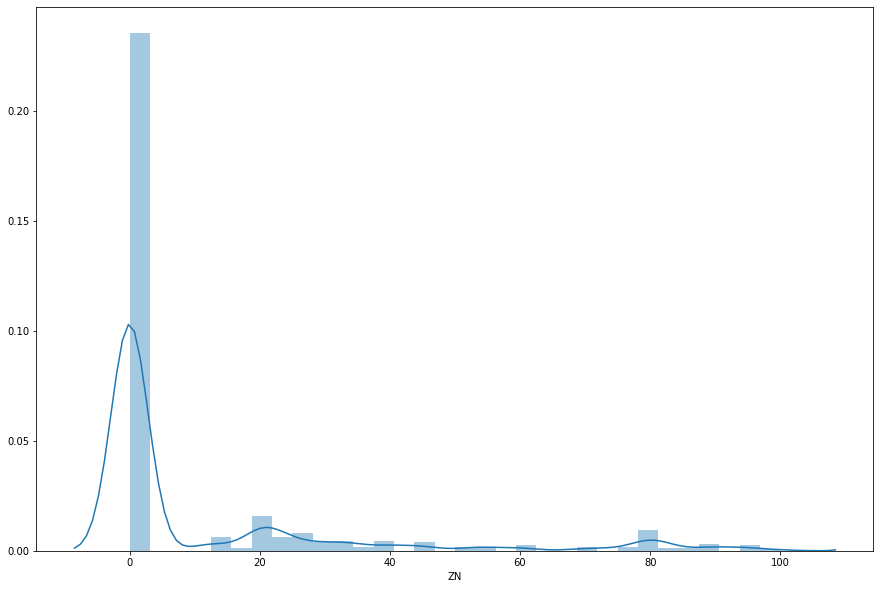

In [13]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['ZN'])

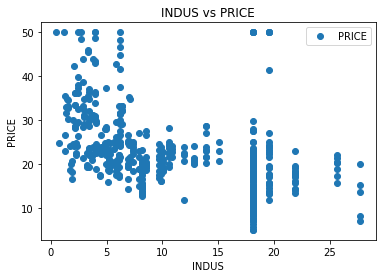

In [14]:
data.plot(x='INDUS', y='PRICE', style='o')  
plt.title('INDUS vs PRICE')  
plt.xlabel('INDUS')  
plt.ylabel('PRICE')  
plt.show()

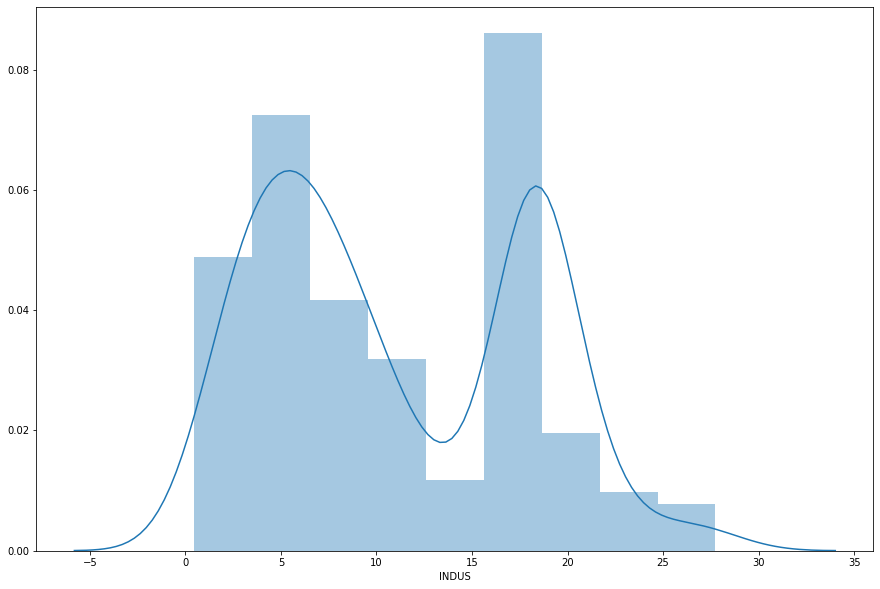

In [15]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['INDUS'])

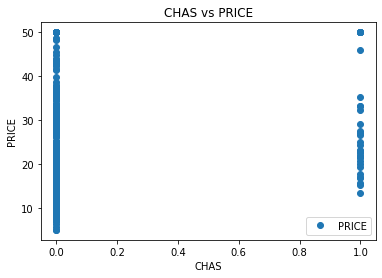

In [16]:
data.plot(x='CHAS', y='PRICE', style='o')  
plt.title('CHAS vs PRICE')  
plt.xlabel('CHAS')  
plt.ylabel('PRICE')  
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

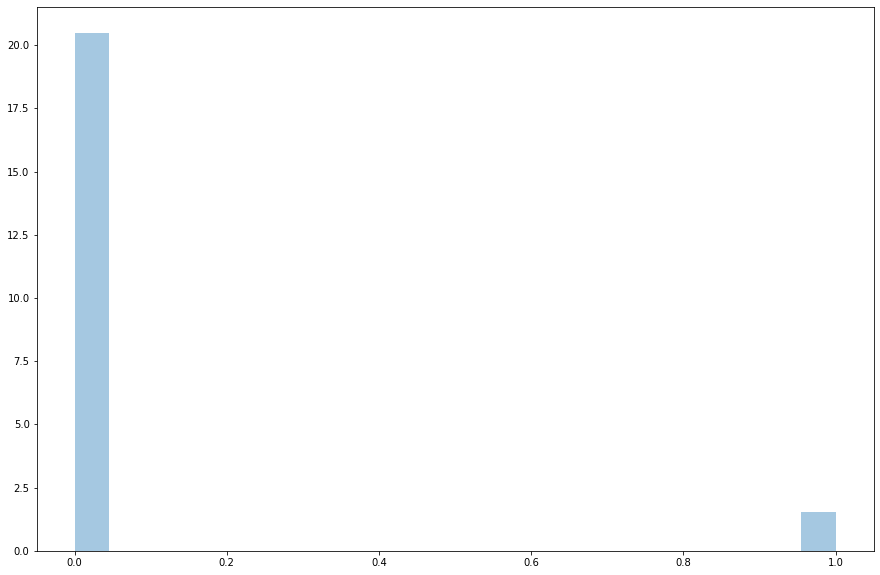

In [17]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['CHAS'])

In [ ]:
data.plot(x='NOX', y='PRICE', style='o')  
plt.title('NOX vs PRICE')  
plt.xlabel('NOX')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['NOX'])

In [ ]:
data.plot(x='RM', y='PRICE', style='o')  
plt.title('RM vs PRICE')  
plt.xlabel('RM')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['RM'])

In [ ]:
data.plot(x='AGE', y='PRICE', style='o')  
plt.title('AGE vs PRICE')  
plt.xlabel('AGE')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['AGE'])

In [ ]:
data.plot(x='DIS', y='PRICE', style='o')  
plt.title('DIS vs PRICE')  
plt.xlabel('DIS')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['AGE'])

In [ ]:
data.plot(x='RAD', y='PRICE', style='o')  
plt.title('RAD vs PRICE')  
plt.xlabel('RAD')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['RAD'])

In [ ]:
data.plot(x='TAX', y='PRICE', style='o')  
plt.title('TAX vs PRICE')  
plt.xlabel('TAX')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['TAX'])

In [ ]:
data.plot(x='PTRATIO', y='PRICE', style='o')  
plt.title('PTRATIO vs PRICE')  
plt.xlabel('PTRATIO')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['PTRATIO'])

In [ ]:
data.plot(x='B', y='PRICE', style='o')  
plt.title('B vs PRICE')  
plt.xlabel('B')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['B'])

In [ ]:
data.plot(x='LSTAT', y='PRICE', style='o')  
plt.title('LSTAT vs PRICE')  
plt.xlabel('LSTAT')  
plt.ylabel('PRICE')  
plt.show()

In [ ]:
plt.figure(figsize=(15,10)) 
plt.tight_layout()
seabornInstance.distplot(data['LSTAT'])